<a href="https://colab.research.google.com/github/johanv26/analisis_numerico/blob/master/4_7_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#paquetes de trabajo
!pip install sympy
import numpy as np
import sympy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Funciones de gradiente descente:

In [30]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter): #Gradiente descendiente paso optimizado  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):
      params=x-s*g.T
      params=params[0,:]  #change into single array
      #return f(x[0]-s*g[0],x[1]-s*g[1],x[2]-s*g[2])
      return f(*params)
    alpha = optimize.fminbound(phi, 0, 10)
  
    x = x - alpha * g.T
    x=x[0,:]
 
    xs[i+1,:] = x

    tol = np.linalg.norm(g)
    if tol < epsi:
      
      break
  return xs,i+1

In [31]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
        break
  return xs,i+1

#Funciones de gradiente y hessiano

In [32]:

def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  
  return grad

def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  
  for i in range(0,n):
    for j in range(0,n):
  
      first_diff=sp.diff(f,variables[j])
      second_diff=sp.diff(first_diff,variables[i])
      hess[i,j]=second_diff
  
  return hess

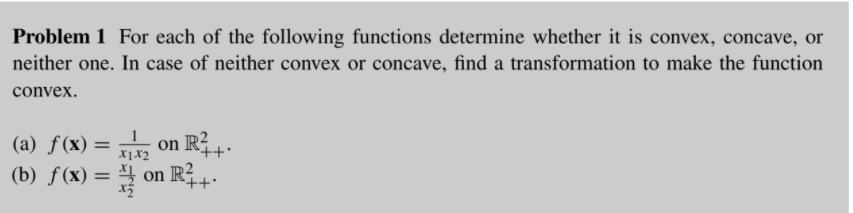

#a-)

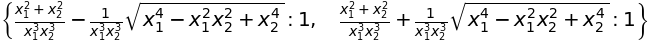

In [33]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=1/(x1*x2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


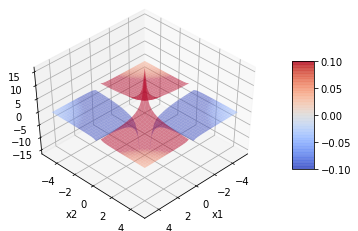

In [34]:
#printing
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
XX = np.arange(-5, 5, 0.25)
YY= np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plot a 3d scatter plot



ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

#b-)

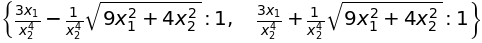

In [35]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1/(x2**2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


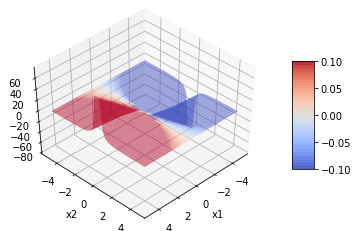

In [36]:
#printing
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
XX = np.arange(-5, 5, 0.25)
YY= np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plot a 3d scatter plot



ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

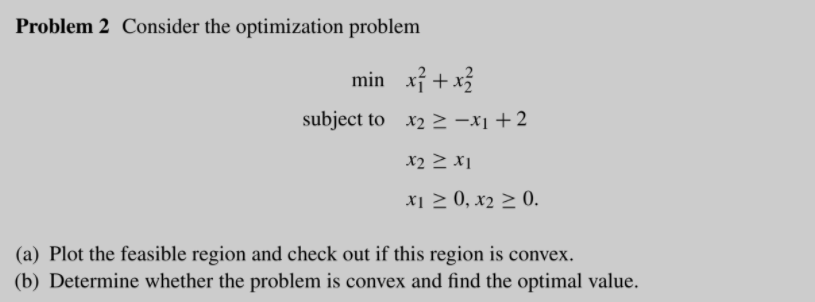

In [94]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1**2+x2**2
plane1=x1+x2-2  #>=0
plane2=x2-x1  #>=0

sp.init_printing()


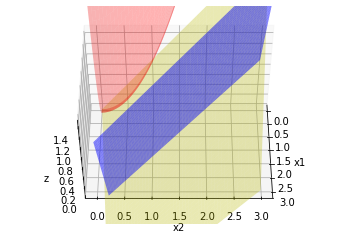

In [112]:
#printing
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
dx=0.01
xmax=3
XX = np.arange(0, xmax, dx)#x1>=0
YY= np.arange(0, xmax, dx)#x2>=0

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)
P1=sp.lambdify([x1,x2],plane1)
P2=sp.lambdify([x1,x2],plane2)
Z=F(X,Y)
Z1=P1(X,Y)
Z2=P2(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, color='red',alpha=0.3)
ax.plot_surface(X, Y, Z1,color='blue',alpha=0.5)
ax.plot_surface(X, Y, Z2,color='yellow',alpha=0.3)
# Add a color bar which maps values to colors.


# plot a 3d scatter plot



ax.view_init(50,0)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
ax.set_zlim(0, 1.5)#P>=0
plt.show()

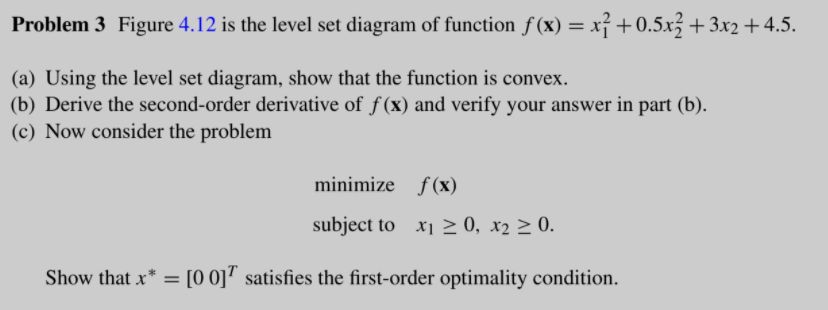

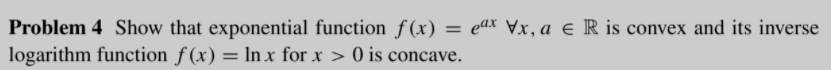